In [1]:
import pandas as pd
import numpy as np
import pyod
import matplotlib.pyplot as pyplot
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn import preprocessing
from pyod.utils.data import evaluate_print

#importando do arquivo modificado com os prints dos métodos unsupervided
import xgbod as XGBOD

from datetime import datetime

np.set_printoptions(precision=3)

In [2]:
testing_set = pd.read_csv('../Unbalanced_Samples/Sample_60K.csv',sep=',',header=0)
training_set = pd.read_csv('../Balanced_Samples/Sample_100K.csv',sep=',',header=0)

c:\python37\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#transforma dados categóricos em números
for f in testing_set.columns: 
    if testing_set[f].dtype=='object': 
        label = preprocessing.LabelEncoder() 
        label.fit(list(testing_set[f].values)) 
        testing_set[f] = label.transform(list(testing_set[f].values))
    
testingSet = testing_set.values
np.random.shuffle(testingSet)

testingSet = testingSet.astype(float)

for i in range (6*10**4-1, 0, -1):
    for j in range(0, 84):
        testingSet[i, j] = float(testingSet[i, j])
        if (np.isinf(testingSet[i, j]) or np.isnan(testingSet[i, j])):
            testingSet = np.delete(testingSet, i, axis=0)

y_test = testingSet[:, 84].astype(int)

In [4]:
#transforma dados categóricos em números
for f in training_set.columns: 
    if training_set[f].dtype=='object': 
        label = preprocessing.LabelEncoder() 
        label.fit(list(training_set[f].values)) 
        training_set[f] = label.transform(list(training_set[f].values))
    
trainingSet = training_set.values
np.random.shuffle(trainingSet)

trainingSet = trainingSet.astype(float)

for i in range (10*10**4-1, 0, -1):
    for j in range(0, 84):
        trainingSet[i, j] = float(trainingSet[i, j])
        if (np.isinf(trainingSet[i, j]) or np.isnan(trainingSet[i, j])):
            trainingSet = np.delete(trainingSet, i, axis=0)

y_train = trainingSet[:, 84].astype(int)

In [5]:
outliers_fraction = 0.5
def testMethod(clf, clf_name):
    print("Started fitting: ", datetime.now(), "\n")
    clf.fit(trainingSet, y_train)
    print("Endend fitting: ", datetime.now(), "\n")

    #####################################################################
    
    print("Started predicting: ", datetime.now(), "\n")
    y_test_pred = clf.predict(testingSet)  # outlier labels (0 or 1)
    y_test_scores = clf.decision_function(testingSet)  # outlier scores
    print("Ended predicting: ", datetime.now(), "\n")
    
    #####################################################################

    print("\nOn Test Data - "+clf_name+":")
    truePositive = 0
    trueNegative = 0
    falsePositive = 0
    falseNegative = 0

    for i in range(y_test.size):
        if(y_test[i] == 1 and y_test_pred[i] == 1):
            truePositive = truePositive+1
        elif (y_test[i] == 0 and y_test_pred[i] == 0):
            trueNegative = trueNegative+1
        elif (y_test[i] == 0 and y_test_pred[i] == 1):
            falsePositive = falsePositive+1
        else:
            falseNegative = falseNegative+1

    
    print()
    print("              CONFUSION MATRIX")
    print()
    print("                  Actual")
    print()
    print("Predicted     ", truePositive, " | ", falsePositive)
    print("              ",falseNegative, " | ", trueNegative,"\n")

    evaluate_print(clf_name, y_test, y_test_scores)

    #####################################################################

    fpr, tpr, threshold = metrics.roc_curve(y_test, y_test_scores)
    roc_auc = metrics.auc(fpr, tpr)

    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic - '+clf_name)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

Started fitting:  2019-10-14 09:23:14.024613 



c:\python37\lib\site-packages\pyod\models\base.py:344: UserWarning: y should not be presented in unsupervised learning.
  "y should not be presented in unsupervised learning.")


Fitting estimator 1 of 68 (standarlization: true):
 KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=1, p=2,
  radius=1.0)
Start:  2019-10-14 09:23:14.359670
End:  2019-10-14 09:28:00.455989 

Fitting estimator 2 of 68 (standarlization: true):
 KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='mean',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=1, p=2,
  radius=1.0)
Start:  2019-10-14 09:28:00.474939
End:  2019-10-14 09:32:40.527411 

Fitting estimator 3 of 68 (standarlization: true):
 LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=1, p=2)
Start:  2019-10-14 09:32:40.533636
End:  2019-10-14 09:37:10.091263 

Fitting estimator 4 of 68 (standarlization: true):
 KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=3, 

End:  2019-10-14 12:29:50.930781 

Fitting estimator 32 of 68 (standarlization: true):
 KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='mean',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=80, p=2,
  radius=1.0)
Start:  2019-10-14 12:29:50.935768
End:  2019-10-14 12:36:54.685571 

Fitting estimator 33 of 68 (standarlization: true):
 LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=80, p=2)
Start:  2019-10-14 12:36:54.690558
End:  2019-10-14 12:43:54.447617 

Fitting estimator 34 of 68 (standarlization: true):
 KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=90, p=2,
  radius=1.0)
Start:  2019-10-14 12:43:54.452591
End:  2019-10-14 12:51:05.652158 

Fitting estimator 35 of 68 (standarlization: true):
 KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='mean',
  metric='minkowski', metric

c:\python37\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


End:  2019-10-14 18:36:10.660465 

Fitting estimator 62 of 68 (standarlization: false):
 IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=20, n_jobs=1, random_state=0,
    verbose=0)
Start:  2019-10-14 18:36:10.662460


c:\python37\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


End:  2019-10-14 18:36:15.632174 

Fitting estimator 63 of 68 (standarlization: false):
 IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=50, n_jobs=1, random_state=0,
    verbose=0)
Start:  2019-10-14 18:36:15.634170


c:\python37\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


End:  2019-10-14 18:36:27.921295 

Fitting estimator 64 of 68 (standarlization: false):
 IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=70, n_jobs=1, random_state=0,
    verbose=0)
Start:  2019-10-14 18:36:27.926309


c:\python37\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


End:  2019-10-14 18:36:45.058511 

Fitting estimator 65 of 68 (standarlization: false):
 IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=0,
    verbose=0)
Start:  2019-10-14 18:36:45.061476


c:\python37\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


End:  2019-10-14 18:37:09.487222 

Fitting estimator 66 of 68 (standarlization: false):
 IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=150, n_jobs=1, random_state=0,
    verbose=0)
Start:  2019-10-14 18:37:09.491169


c:\python37\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


End:  2019-10-14 18:37:46.166154 

Fitting estimator 67 of 68 (standarlization: false):
 IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=200, n_jobs=1, random_state=0,
    verbose=0)
Start:  2019-10-14 18:37:46.169121


c:\python37\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


End:  2019-10-14 18:38:35.385551 

Fitting estimator 68 of 68 (standarlization: false):
 IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=250, n_jobs=1, random_state=0,
    verbose=0)
Start:  2019-10-14 18:38:35.389541


c:\python37\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


End:  2019-10-14 18:39:36.590961 

Fitting XGBoost: 
Start:  2019-10-14 18:39:36.663741
End:  2019-10-14 18:40:40.686648 

Endend fitting:  2019-10-14 18:40:41.692957 

Started predicting:  2019-10-14 18:40:41.693955 


Generating new features for prediction: 

Predicting estimator 1 of 68 (standarlization: true):
 KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=1, p=2,
  radius=1.0)
Start:  2019-10-14 18:40:41.797679
End:  2019-10-14 18:51:02.402811 

Predicting estimator 2 of 68 (standarlization: true):
 KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='mean',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=1, p=2,
  radius=1.0)
Start:  2019-10-14 18:51:02.403811
End:  2019-10-14 19:01:23.163057 

Predicting estimator 3 of 68 (standarlization: true):
 LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors

End:  2019-10-14 23:03:10.176903 

Predicting estimator 31 of 68 (standarlization: true):
 KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=80, p=2,
  radius=1.0)
Start:  2019-10-14 23:03:10.179895
End:  2019-10-14 23:16:33.300310 

Predicting estimator 32 of 68 (standarlization: true):
 KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='mean',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=80, p=2,
  radius=1.0)
Start:  2019-10-14 23:16:33.303270
End:  2019-10-14 23:28:30.443997 

Predicting estimator 33 of 68 (standarlization: true):
 LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=80, p=2)
Start:  2019-10-14 23:28:30.448945
End:  2019-10-14 23:33:17.028249 

Predicting estimator 34 of 68 (standarlization: true):
 KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='min

End:  2019-10-15 01:29:12.166371 

Predicting estimator 64 of 68 (standarlization: false):
 IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=70, n_jobs=1, random_state=0,
    verbose=0)
Start:  2019-10-15 01:29:12.171328
End:  2019-10-15 01:29:15.907343 

Predicting estimator 65 of 68 (standarlization: false):
 IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=0,
    verbose=0)
Start:  2019-10-15 01:29:15.911330
End:  2019-10-15 01:29:21.245113 

Predicting estimator 66 of 68 (standarlization: false):
 IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=150, n_jobs=1, random_state=0,
    verbose=0)
Start:  2019-10-15 01:29:21.250058
End:  2019-10-15 01:29:29.273611 

Predicting estimator 67 of 68 (standarlization: false):
 IForest(behaviour='old', bootstrap=False, 

End:  2019-10-15 05:11:39.881095 

Predicting estimator 26 of 68 (standarlization: true):
 KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='mean',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=60, p=2,
  radius=1.0)
Start:  2019-10-15 05:11:39.885070
End:  2019-10-15 05:23:23.116488 

Predicting estimator 27 of 68 (standarlization: true):
 LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=60, p=2)
Start:  2019-10-15 05:23:23.120109
End:  2019-10-15 05:27:54.935505 

Predicting estimator 28 of 68 (standarlization: true):
 KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=70, p=2,
  radius=1.0)
Start:  2019-10-15 05:27:54.940465
End:  2019-10-15 05:39:44.029991 

Predicting estimator 29 of 68 (standarlization: true):
 KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='mean',
  metric='minkow

End:  2019-10-15 08:02:04.655302 

Predicting estimator 59 of 68 (standarlization: true):
 OCSVM(cache_size=200, coef0=0.0, contamination=0.1, degree=3, gamma='auto',
   kernel='rbf', max_iter=-1, nu=0.9, shrinking=True, tol=0.001,
   verbose=False)
Start:  2019-10-15 08:02:04.660290
End:  2019-10-15 08:11:38.788496 

Predicting estimator 60 of 68 (standarlization: true):
 OCSVM(cache_size=200, coef0=0.0, contamination=0.1, degree=3, gamma='auto',
   kernel='rbf', max_iter=-1, nu=0.99, shrinking=True, tol=0.001,
   verbose=False)
Start:  2019-10-15 08:11:38.793482
End:  2019-10-15 08:22:15.422656 

Predicting estimator 61 of 68 (standarlization: false):
 IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=10, n_jobs=1, random_state=0,
    verbose=0)
Start:  2019-10-15 08:22:15.426676
End:  2019-10-15 08:22:16.027084 

Predicting estimator 62 of 68 (standarlization: false):
 IForest(behaviour='old', bootstrap=False, contami

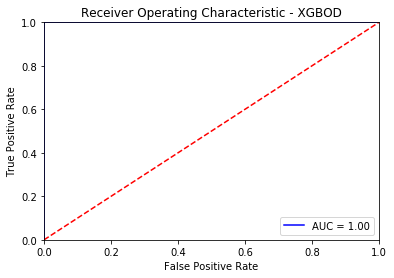

In [6]:
testMethod(XGBOD.XGBOD(contamination= outliers_fraction), "XGBOD")

In [10]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from xgboost import plot_tree

In [11]:
model_name = 'XGBOOST'
model = XGBClassifier()
model.fit(trainingSet, y_train) # matriz(sem label de respostas), vetor(label com respostas de treino)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


On Test Data - XGBOOST:

              CONFUSION MATRIX

                  Actual

Predicted      10256  |  0
               0  |  49744 



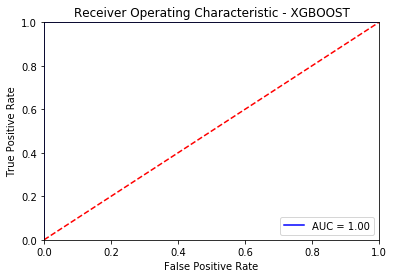

In [12]:
y_pred = model.predict(testingSet)
predictions = [round(value) for value in y_pred]

print("\nOn Test Data - "+model_name+":")
truePositive = 0
trueNegative = 0
falsePositive = 0
falseNegative = 0

for i in range(y_test.size):
    if(y_test[i] == 1 and y_pred[i] == 1):
        truePositive = truePositive+1
    elif (y_test[i] == 0 and y_pred[i] == 0):
        trueNegative = trueNegative+1
    elif (y_test[i] == 0 and y_pred[i] == 1):
        falsePositive = falsePositive+1
    else:
        falseNegative = falseNegative+1
print()
print("              CONFUSION MATRIX")
print()
print("                  Actual")
print()
print("Predicted     ", truePositive, " | ", falsePositive)
print("              ",falseNegative, " | ", trueNegative,"\n")

fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
    
plt.title('Receiver Operating Characteristic - '+model_name)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()